**Literature review**

A statistical method for examining data points collected at regular intervals throughout time in order to identify patterns and trends is called time series analysis.

Process of time series analysis

    - collecting and cleaning data 
    - create visualizations for features
    - observing the stationarity of data
    - model selection and training
    - get predictions

The first two task has been carried out in eda-visualization notebook. I will do check stationarity and chart development in this notebook.

**1 - Selling Price Analysis**

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
#import data set
price_df = pd.read_csv('cleaned_price_pred.csv')
price_df.head()

,date,item_id,price_base
0,2022-08-28,0973df3ff57f,54.500000
1,2022-08-28,23b18d1f7da9,50.840000
2,2022-08-28,2c007023f650,29.920000
3,2022-08-28,99d388c37359,21.286667
4,2022-08-28,e5b2b6f57ea7,31.943333


In [4]:
price_df['item_id'].unique().tolist()

['0973df3ff57f',
 '23b18d1f7da9',
 '2c007023f650',
 '99d388c37359',
 'e5b2b6f57ea7']

In [5]:
#map product names as identifiable letters
dict = {'0973df3ff57f':'A',
'23b18d1f7da9':'B',
'2c007023f650':'C',
'99d388c37359':'D',
'e5b2b6f57ea7':'E'
}   

def map_product_name(x):
    return dict[x]

price_df['product_name'] = price_df['item_id'].map(map_product_name)
price_df.head()

,date,item_id,price_base,product_name
0,2022-08-28,0973df3ff57f,54.500000,A
1,2022-08-28,23b18d1f7da9,50.840000,B
2,2022-08-28,2c007023f650,29.920000,C
3,2022-08-28,99d388c37359,21.286667,D
4,2022-08-28,e5b2b6f57ea7,31.943333,E


In [6]:
#creating a new data frame with date, product name as column and price
price_pivot = price_df.pivot(index='date',columns='product_name',values='price_base').fillna(0).reset_index()
price_pivot.head()

product_name,date,A,B,C,D,E
0,2022-08-28,54.500000,50.840000,29.920000,21.286667,31.943333
1,2022-08-29,54.870000,39.526667,34.060000,42.946667,22.993333
2,2022-08-30,54.483333,40.183333,32.520000,40.583333,26.693333
3,2022-08-31,52.096667,41.420000,32.293333,31.693333,26.850000
4,2022-09-01,51.770000,43.150000,36.340000,46.303333,31.306667


Lets check the stationarity of the data. There are several ways to check the time series stationarity.

    - Split data set into parts and check the mean, variance (this way not a success way)
    - Augmented Dickey Fuller (ADF) test (robust method)
    - Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
    - Phillips-Perron (PP) Test

We will check through the ADF test.


In [7]:
#lets check the stationarity of the data
for item in dict.values():
    res = adfuller(price_pivot[item])
    print(f'Product {item} p-vale:{res[1]:.4f}') 

Product A p-vale:0.2956
Product B p-vale:0.0275
Product C p-vale:0.0379
Product D p-vale:0.0001
Product E p-vale:0.0006


In ADF test,

H0 = Null hypothesis - data is non-stationary

Ha = Alternative hypothesis - data is stationary

For product A, we can't reject the null hypothesis.
Product B,C,D,E can reject the null hypothesis. Therefore, the price is stationary.

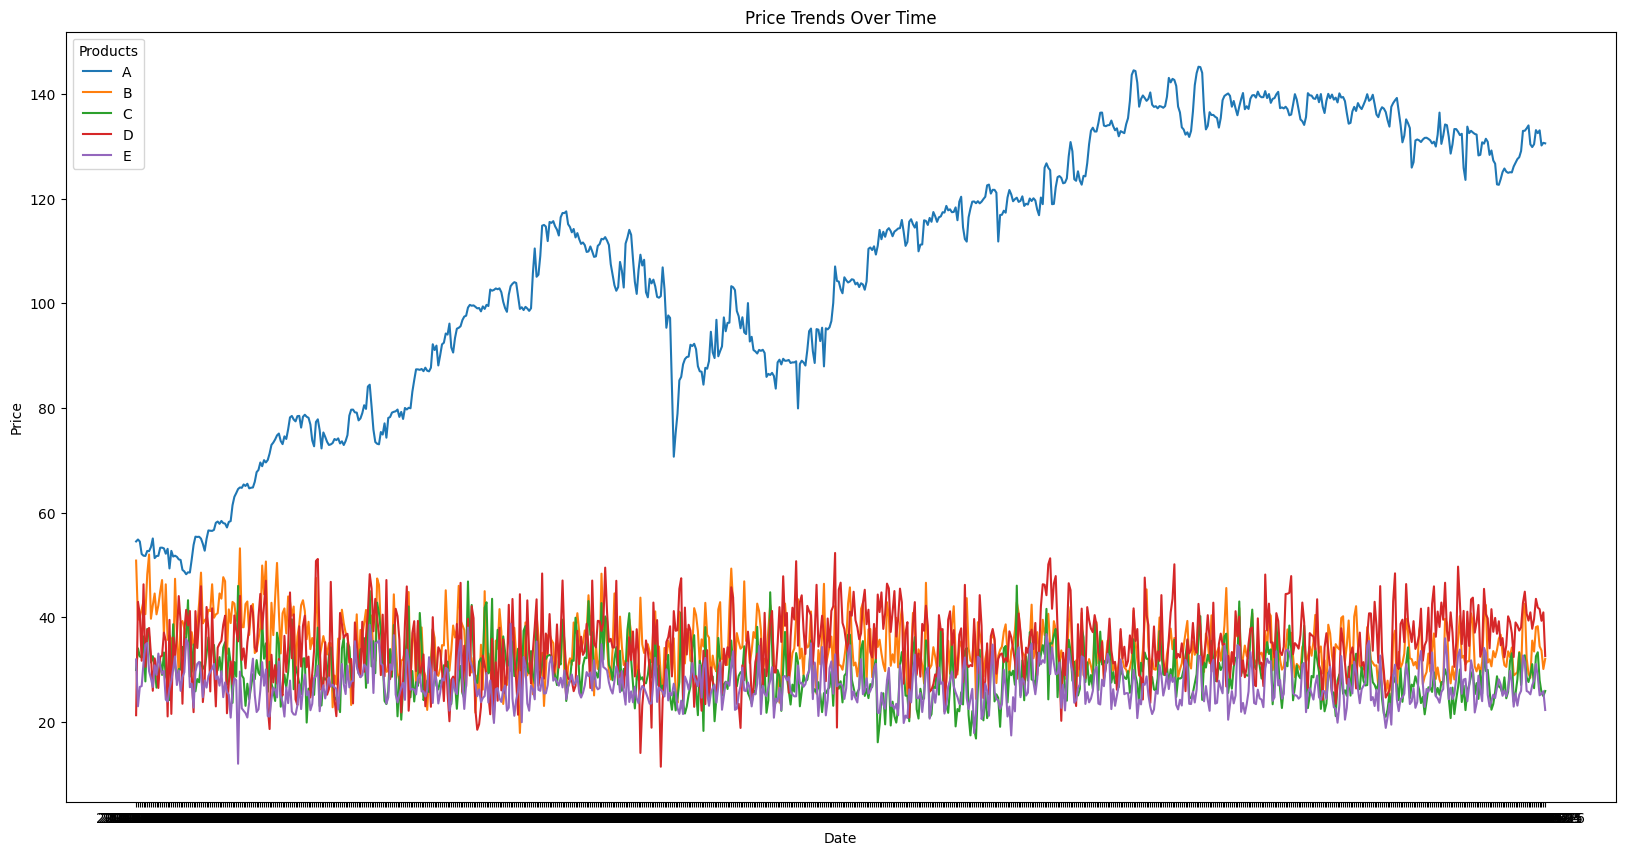

In [8]:
# Plot the line chart
plt.figure(figsize=(20, 10))
for column in price_pivot.columns[1:]:
    plt.plot(price_pivot['date'], price_pivot[column], label=column)

plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Products')
plt.show()

**Conclusion**

Product A is non-stationary (p-value > 0.05). This means its statistical properties (mean, variance, autocorrelation) change over time, and it may require transformation (differencing, detrending) before modeling.

Products B, C, D, and E are stationary (p-value < 0.05), meaning their properties remain stable over time, making them suitable for direct forecasting without additional transformations.

Product D is the most strongly stationary, followed by Product E, since they have the lowest p-values.

**2 - Demand Analysis**

In [9]:
#import data set
qty_df = pd.read_csv('cleaned_qty_pred.csv')
qty_df.head()

,date,item_id,quantity
0,2022-08-28,0973df3ff57f,300.922
1,2022-08-28,23b18d1f7da9,63.000
2,2022-08-28,2c007023f650,79.000
3,2022-08-28,99d388c37359,42.000
4,2022-08-28,e5b2b6f57ea7,187.000


In [10]:
qty_df['product_name']=qty_df['item_id'].map(map_product_name)
qty_df.head()

,date,item_id,quantity,product_name
0,2022-08-28,0973df3ff57f,300.922,A
1,2022-08-28,23b18d1f7da9,63.000,B
2,2022-08-28,2c007023f650,79.000,C
3,2022-08-28,99d388c37359,42.000,D
4,2022-08-28,e5b2b6f57ea7,187.000,E


In [11]:
#create pivot table for quantity
qty_pivot = qty_df.pivot(index='date',columns='product_name',values='quantity').fillna(0).reset_index()
qty_pivot.head()

product_name,date,A,B,C,D,E
0,2022-08-28,300.922,63.0,79.0,42.0,187.0
1,2022-08-29,373.880,135.0,178.0,39.0,414.0
2,2022-08-30,332.346,146.0,174.0,44.0,398.0
3,2022-08-31,395.705,149.0,188.0,56.0,420.0
4,2022-09-01,505.785,140.0,181.0,60.0,431.0


In [12]:
#lets check the stationarity of the data
for item in dict.values():
    res = adfuller(qty_pivot[item])
    print(f'Product {item} p-vale:{res[1]:.4f}') 

Product A p-vale:0.2827
Product B p-vale:0.9506
Product C p-vale:0.9553
Product D p-vale:0.9127
Product E p-vale:0.9260


According to the p-values, we can't reject the null hypothesis for demand of all the prodcuts we considered. Therefore, demand is non-stationary.

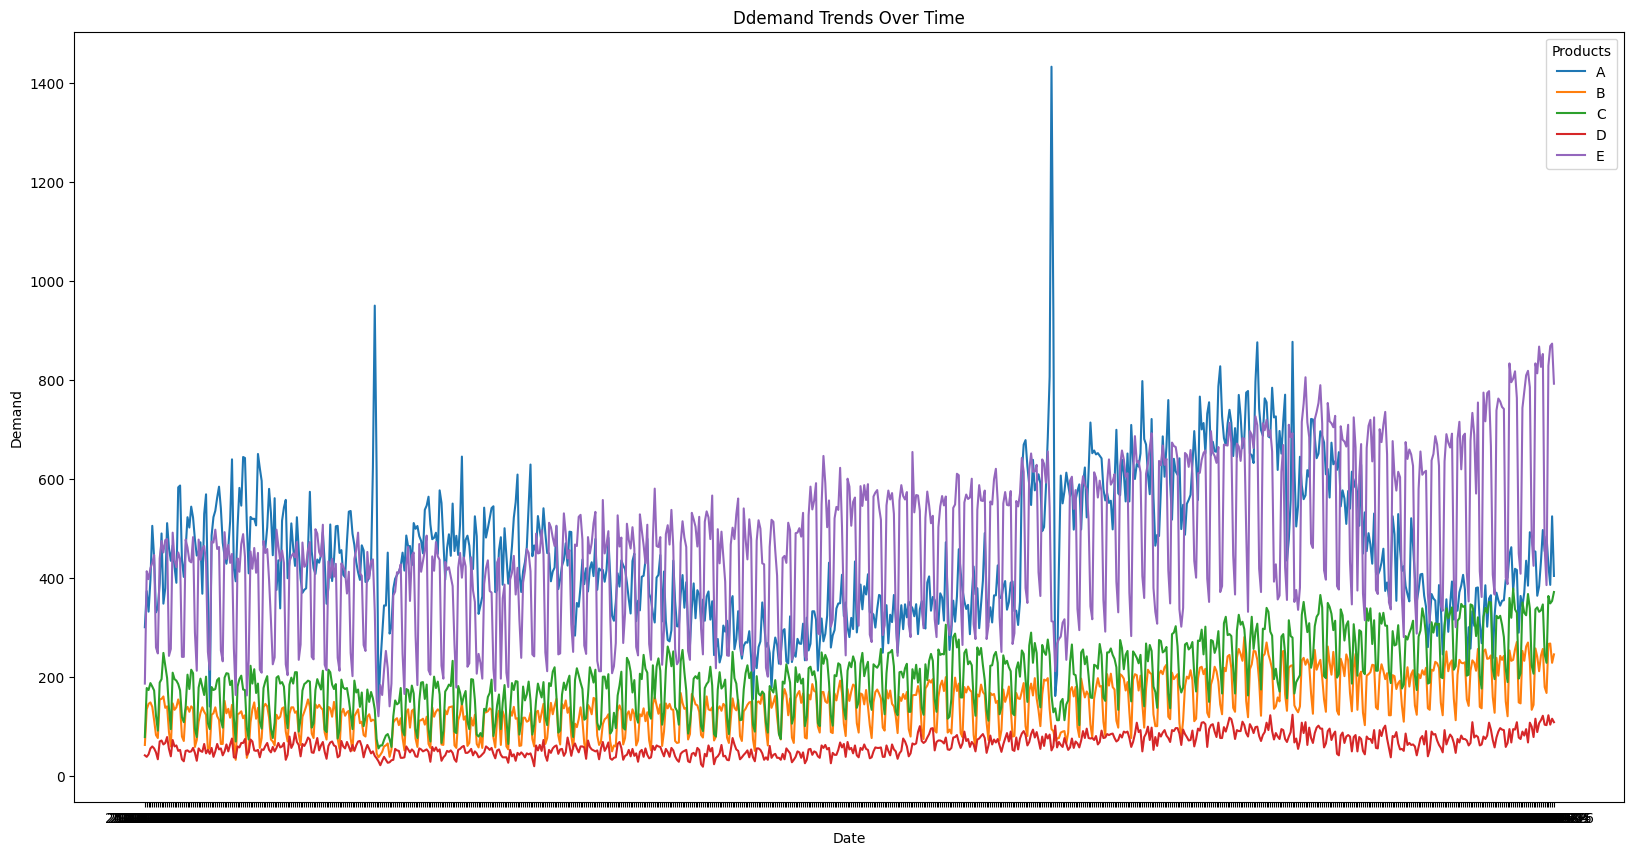

In [13]:
#plot the line chart
plt.figure(figsize=(20,10))
for column in qty_pivot.columns[1:]:
    plt.plot(qty_pivot['date'],qty_pivot[column],label=column)
plt.title('Ddemand Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend(title='Products')
plt.show()   

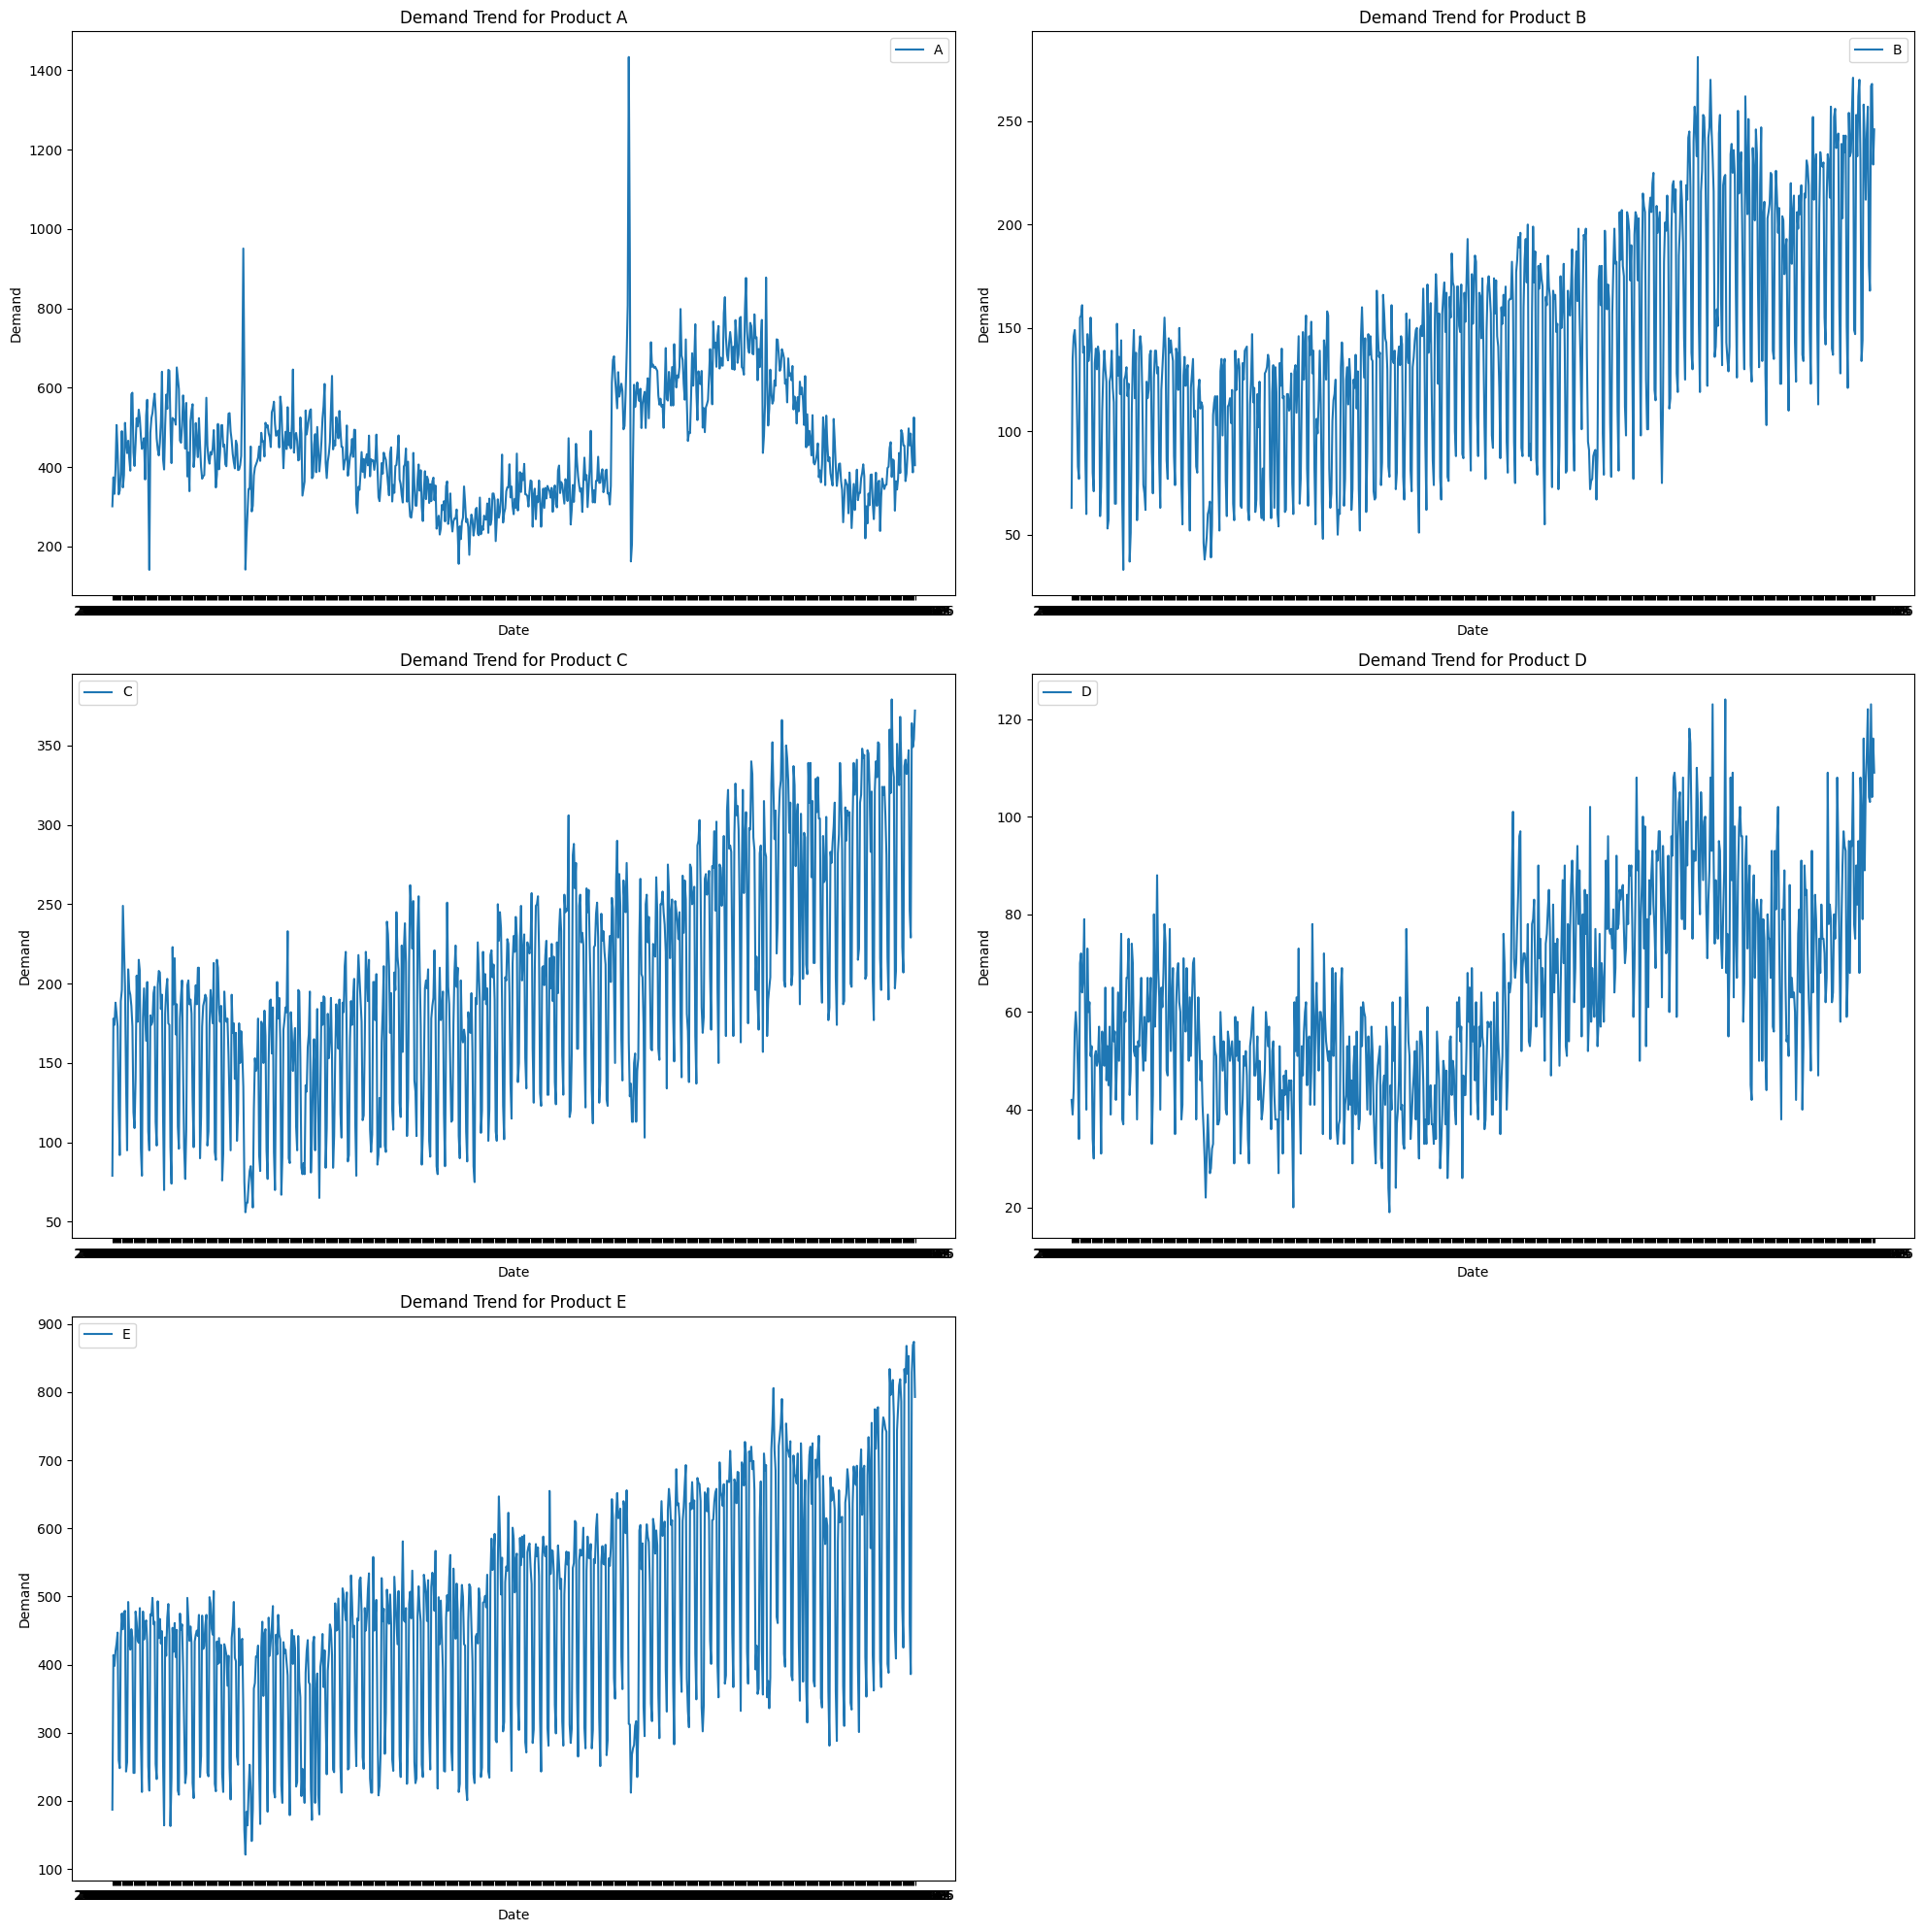

In [14]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(qty_pivot.columns[1:], 1):
    plt.subplot(3, 2, i)  
    plt.plot(qty_pivot['date'], qty_pivot[column], label=column)
    plt.title(f'Demand Trend for Product {column}')
    plt.xlabel('Date')
    plt.ylabel('Demand')
    plt.legend()

plt.tight_layout() 
plt.show()

**Conclusion**

The demand for A has some cyclic nature. Other products have increasing trend for the demand. Therefore, the charts proves the non-stationary nature of demand for all five products.

**Find Auto Correlation (ACF)**

ACF and PACF are used to check the correlation current value with the lag values in time series. The ACF measures linear relationship between time series and its lagged values. The PACF measures direct relationship between a variable and its past values.

ACF consider when deciding the order of MA.

PACF consider when deciding the order of AR.

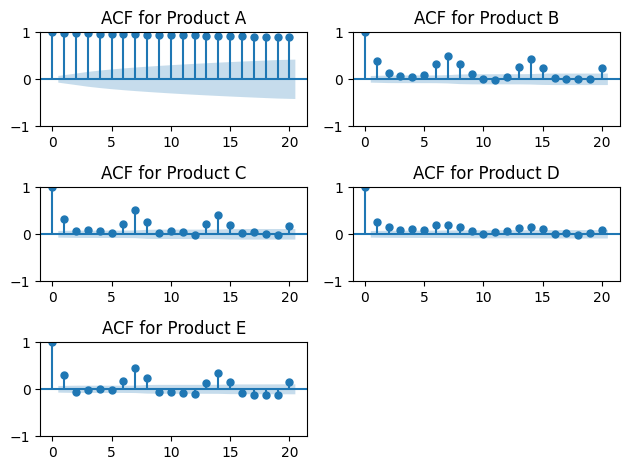

In [15]:
for i, column in enumerate(qty_pivot.columns[1:], 1):
    plt.subplot(3, 2, i)  
    plot_acf(price_pivot[column], lags=20, ax=plt.gca())
    plt.title(f'ACF for Product {column}')
plt.tight_layout() 
plt.show()

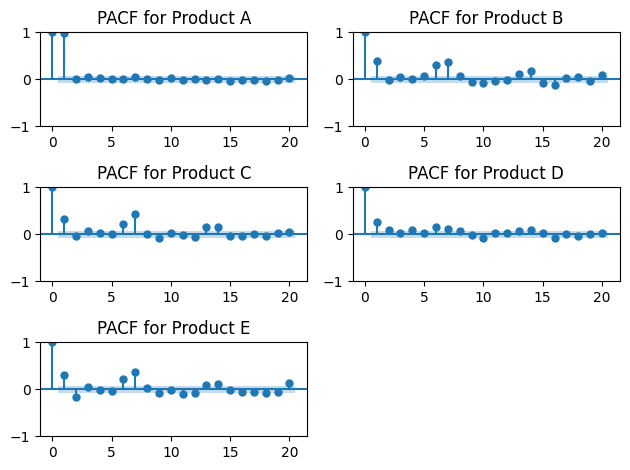

In [16]:
for i, column in enumerate(qty_pivot.columns[1:], 1):
    plt.subplot(3, 2, i)  
    plot_pacf(price_pivot[column], lags=20, ax=plt.gca())
    plt.title(f'PACF for Product {column}')
plt.tight_layout() 
plt.show()

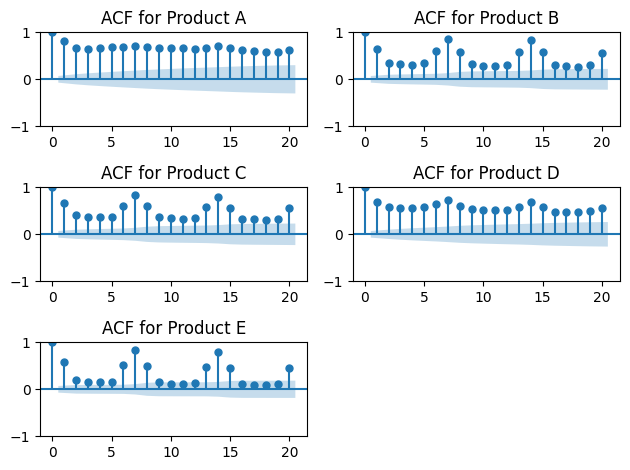

In [17]:
for i, column in enumerate(qty_pivot.columns[1:], 1):
    plt.subplot(3, 2, i)  
    plot_acf(qty_pivot[column], lags=20, ax=plt.gca())
    plt.title(f'ACF for Product {column}')
plt.tight_layout() 
plt.show()

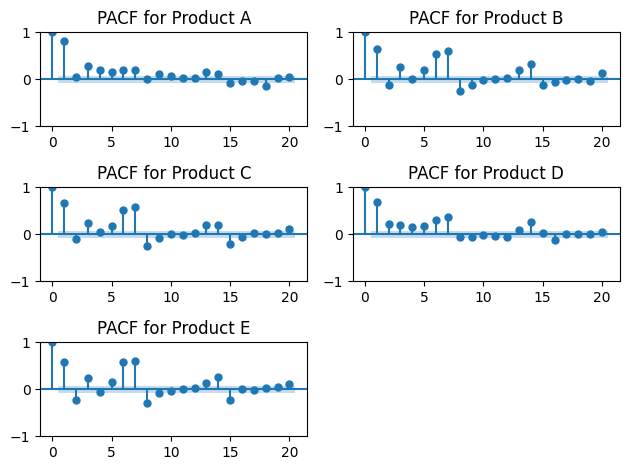

In [18]:
for i, column in enumerate(qty_pivot.columns[1:], 1):
    plt.subplot(3, 2, i)  
    plot_pacf(qty_pivot[column], lags=20, ax=plt.gca())
    plt.title(f'PACF for Product {column}')
plt.tight_layout() 
plt.show()

**Conclusion**

ACF for selling price  
    - Product A - plot shows trend in the time series. no sudden break within lag 20. It means the non-stationarity os time series. Therefore, we have convert to stationary series of all non-stationary series.  
    - Product B, C, E shows seasonal pattern in acf plot. The order for MA for them is 1.  
    - Product D does not show correlation. Therefore, AR/ MA, ARIMA does not effective for the forecasting.  

ACF for demand  
    - Product A has trend. no sudden break. need to convert stationary.  
    - Other for acf plots show seasonality.   
    - B, C, D has positive correlation. Which  shows non-stationarity of series. E also having seasonality, but stationary than the B, C and D.


In [22]:
#save the pivot tables to develop forecasting models
price_pivot.to_csv('price_pivot.csv', index=False)
qty_pivot.to_csv('qty_pivot.csv', index=False)  